# ***0 - Imports***

In [194]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**0.1 Applied Machine Learning Assignment**

**Preliminary Task (10%)**

This notebook performs the required preprocessing steps to prepare the dataset for model training. The key steps include:
- Handling missing data
- Detecting and treating outliers
- Encoding categorical variables
- Scaling numerical features
- Splitting the dataset into training, validation, and test sets

# ***0.2 - Data Loading***

In [195]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
# Load the dataset using pandas
# The dataset contains car advertisement details, including mileage, price, and vehicle specifications.
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/MMU/Assignments/0 Sem 1/Data Science/Files/adverts.csv')

# **0. Data Description and Pre-Processing**

## **0.1 - Summary**

***1. Summarize the Dataset***

In [197]:
# Basic information about the dataset
print("Dataset Info:")
data.info()

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Checking missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB

Summary Statistics:
       public_reference        mileage  

***2.1 Correlation Heatmap***

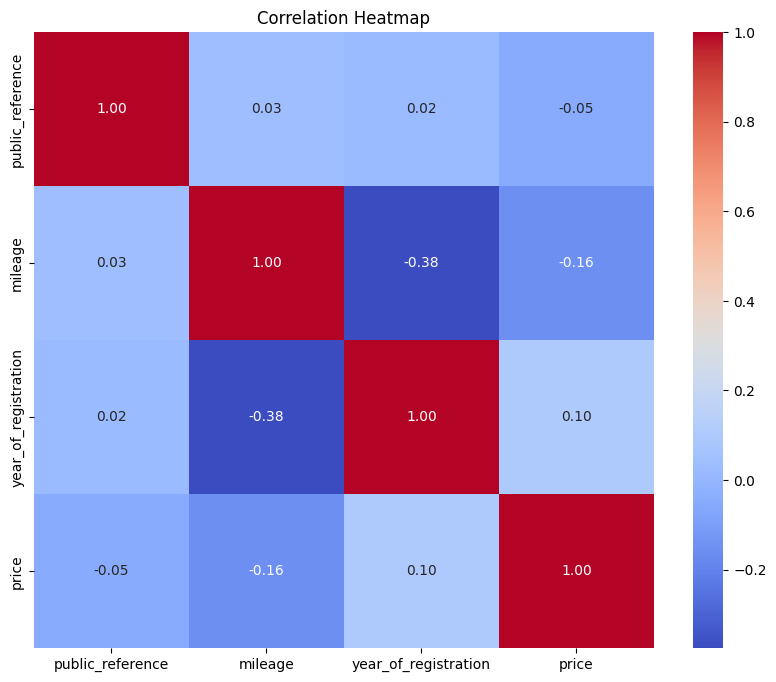

In [198]:
# Exclude non-numerical columns to compute correlation
numerical_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

***2.2 Scatter Plot: Mileage vs. Price***

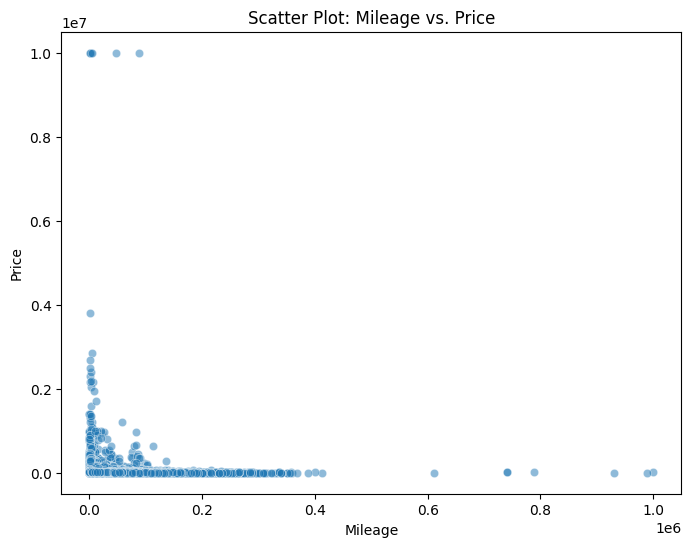

In [199]:
# Scatter plot for mileage vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['mileage'], y=data['price'], alpha=0.5)
plt.title('Scatter Plot: Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

***3. Visualize Missing Values***

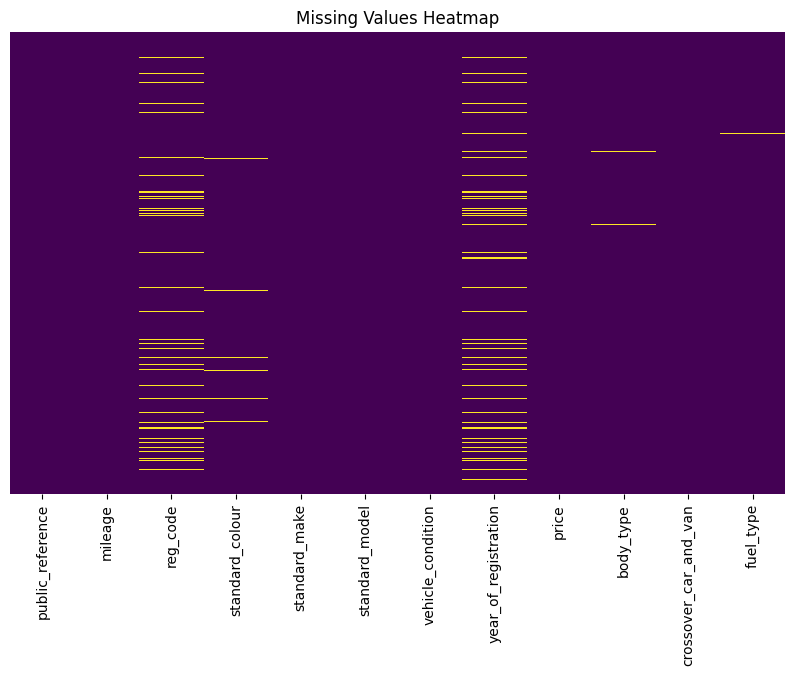

In [200]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

**3. Identify Outliers**

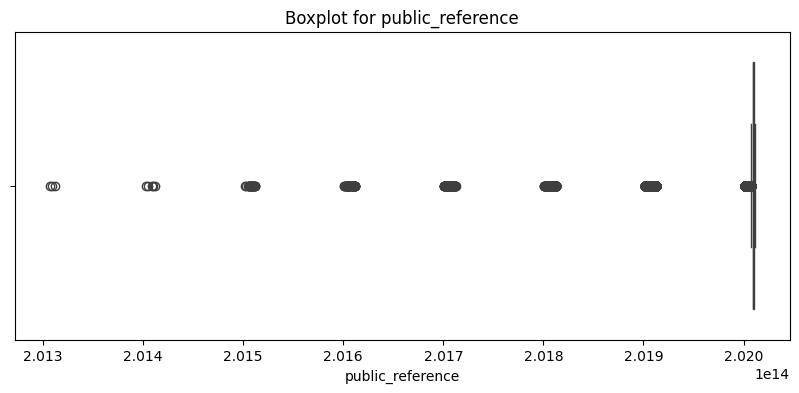

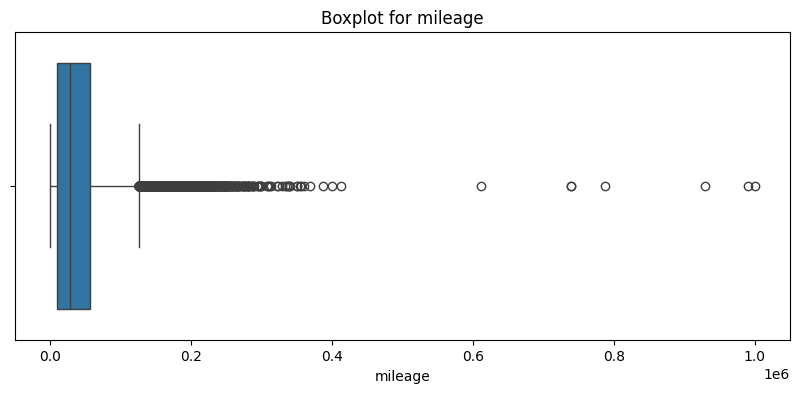

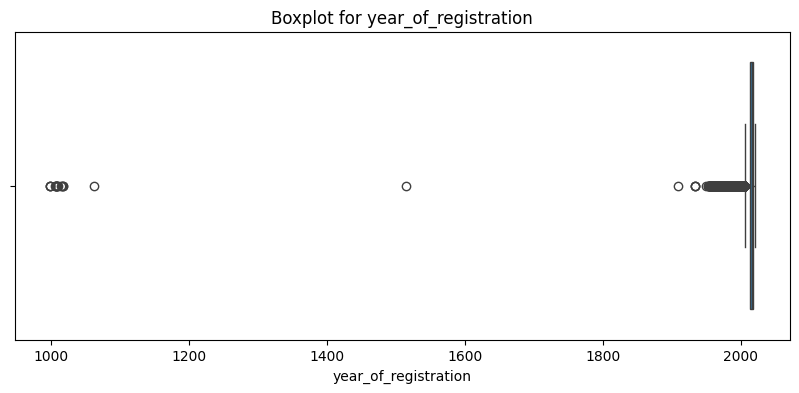

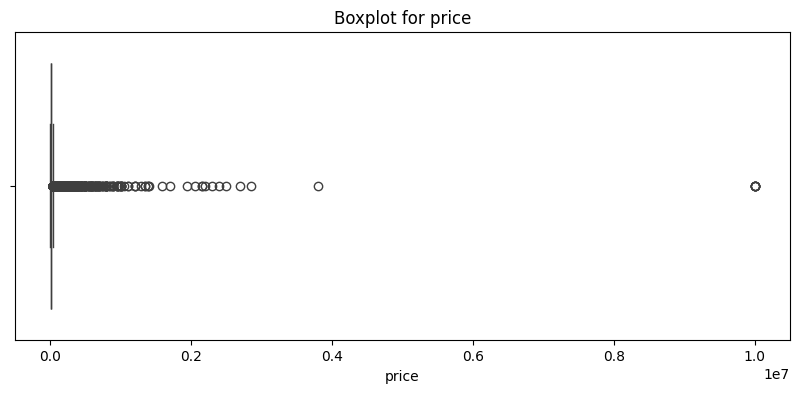

In [201]:
# Boxplot visualization for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

***5. IQR for Outlier handling***

In [202]:
# Import necessary libraries
import pandas as pd

# Function to detect and address outliers using IQR
def handle_outliers(df, column, remove=True):
    """
    Detect and handle outliers in a given column using the IQR method.

    Parameters:
    - df: DataFrame
    - column: str, the column name to process
    - remove: bool, if True removes outliers; if False, caps them

    Returns:
    - DataFrame: Updated DataFrame with outliers handled
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if remove:
        # Option 1: Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        # Option 2: Cap outliers (retain data but limit extreme values)
        df[column] = df[column].clip(lower_bound, upper_bound)

    return df

# **Handle Outliers in 'price' and 'mileage' Columns**
# Option to remove or cap outliers
data = handle_outliers(data, 'price', remove=True)  # Removing outliers
data = handle_outliers(data, 'mileage', remove=True)  # Removing outliers

# Check new dataset size
print("Remaining Rows After Outlier Removal:", data.shape[0])

Remaining Rows After Outlier Removal: 368172


## **0.2 - Missing Values**

***1. Missing Values Handling***

In [203]:
# Fill missing values
numerical_features = ['mileage', 'year_of_registration']
categorical_features = ['fuel_type', 'vehicle_condition', 'body_type', 'reg_code', 'standard_colour']

# Check column names in the DataFrame
print("Columns in DataFrame:")
print(data.columns)

# Fill numerical features with median
for col in numerical_features:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Fill categorical features with 'Unknown'
for col in categorical_features:
    if col in data.columns:
        data[col] = data[col].fillna('Unknown')
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Confirm no missing values remain
print("Remaining Missing Values:")
print(data.isnull().sum())

Columns in DataFrame:
Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')
Remaining Missing Values:
public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


## ***0.3 - Encoding: Target Encoding***

**Sampling**

In [204]:
# Sampling a smaller subset of data (10,000 rows)
# Assuming `data` is your preprocessed DataFrame

# Set a random seed for reproducibility
random_seed = 42

# Take a random sample of 5,000 rows
sample_data = data.sample(n=5000, random_state=random_seed)

# Separate features (X) and target variable (y)
X_sample = sample_data.drop(columns=['price'])  # Replace 'price' with your target column
y_sample = sample_data['price']

# Confirm the size of the sampled dataset
print("Sampled Dataset Size:", X_sample.shape, y_sample.shape)

Sampled Dataset Size: (5000, 11) (5000,)


**Target Encoding**

In [205]:
# Define the categorical columns to encode
categorical_features = ['fuel_type', 'vehicle_condition', 'body_type',
                        'reg_code', 'standard_colour', 'standard_make', 'standard_model']

# Define the target column
target_column = 'price'

# Function to apply target encoding
def target_encode(data, target_column, columns_to_encode):
    """
    Apply target encoding to specified columns and handle non-numeric data by encoding it.
    """
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()

    for col in columns_to_encode:
        if col in data.columns:
            # Encode non-numeric columns if necessary
            if data[col].dtype == 'object':
                data[col] = encoder.fit_transform(data[col].astype(str))

            # Calculate mean target value for each category
            encoding_map = data.groupby(col)[target_column].mean()

            # Apply mapping to column
            data[f'{col}_encoded'] = data[col].map(encoding_map)
        else:
            print(f"Warning: Column '{col}' not found in the dataset.")

    return data

# Apply target encoding to the sampled dataset
encoded_sample_data = target_encode(sample_data, target_column=target_column, columns_to_encode=categorical_features)

# Drop original categorical columns after encoding
X_sample = encoded_sample_data.drop(columns=categorical_features, errors='ignore')
y_sample = encoded_sample_data[target_column]

# Verify the dataset
print("Non-Numeric Columns in X_sample (After Encoding):")
print(X_sample.select_dtypes(include=['object']).columns)

print("Encoded Columns in X_sample:")
print(X_sample.filter(like='_encoded').columns)

print("First Few Rows of Final Encoded Sample Data:")
print(X_sample.head())

Non-Numeric Columns in X_sample (After Encoding):
Index([], dtype='object')
Encoded Columns in X_sample:
Index(['fuel_type_encoded', 'vehicle_condition_encoded', 'body_type_encoded',
       'reg_code_encoded', 'standard_colour_encoded', 'standard_make_encoded',
       'standard_model_encoded'],
      dtype='object')
First Few Rows of Final Encoded Sample Data:
        public_reference  mileage  year_of_registration  price  \
401031   202007271746434  90000.0                2009.0   3495   
309777   202010165094316  17811.0                2018.0  20993   
307552   202007081012780  13874.0                2018.0  15500   
161013   202011015663060  21863.0                2016.0  16500   
331394   202010155041608      5.0                2016.0  22540   

        crossover_car_and_van  fuel_type_encoded  vehicle_condition_encoded  \
401031                  False       12159.936850               12976.440613   
309777                  False       19011.550000               12976.440613   
307

## ***0.4 - Scaling_Numerical_Features***

***1. Scaling***

In [206]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Features to scale
numerical_features = ['mileage', 'price']

# Scale the selected numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the scaled dataset
print(data.head())

   public_reference   mileage reg_code standard_colour standard_make  \
1   202007020778260  2.280448       61            Blue        Jaguar   
2   202007020778474 -0.953773       17            Grey         SKODA   
3   202007080986776  0.244206       16           Brown      Vauxhall   
4   202007161321269  0.856077       64            Grey    Land Rover   
5   202009304412074 -0.689703       17            Blue          Audi   

      standard_model vehicle_condition  year_of_registration     price  \
1                 XF              USED                2011.0 -0.801887   
2               Yeti              USED                2017.0  0.042067   
3              Mokka              USED                2016.0 -0.681925   
4  Range Rover Sport              USED                2015.0  1.608806   
5                 S5              USED                2017.0  1.850538   

     body_type  crossover_car_and_van fuel_type  
1       Saloon                  False    Diesel  
2          SUV        

***2. VAlidation***

Summary Statistics of Scaled Features:
            mileage         price
count  3.681720e+05  3.681720e+05
mean   3.572283e-17  8.036189e-17
std    1.000001e+00  1.000001e+00
min   -1.204963e+00 -1.631372e+00
25%   -8.088566e-01 -7.477530e-01
50%   -2.388505e-01 -1.990628e-01
75%    6.306504e-01  5.824983e-01
max    2.943201e+00  3.026647e+00


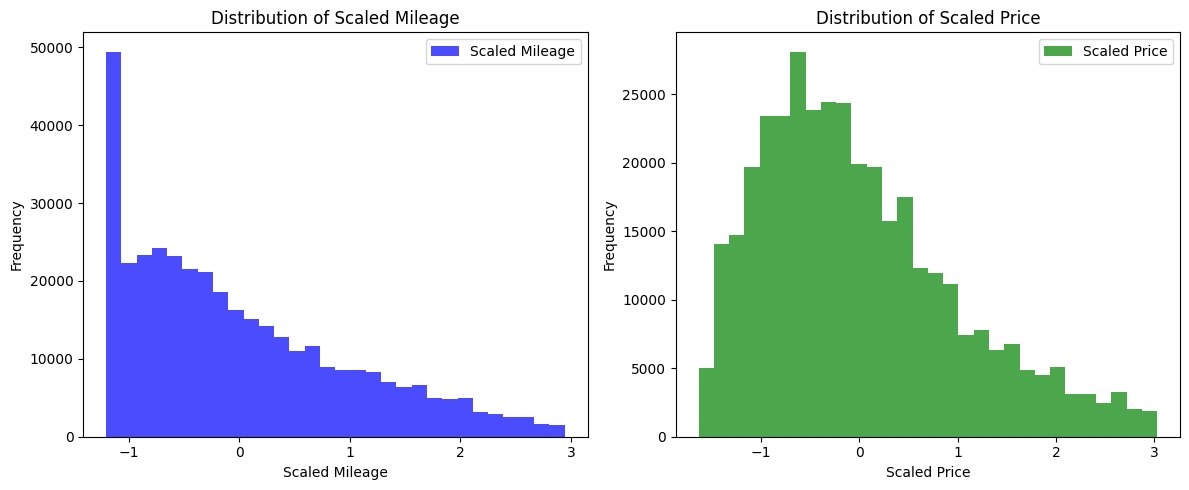

In [207]:
import matplotlib.pyplot as plt

# Inspect summary statistics
print("Summary Statistics of Scaled Features:")
print(data[['mileage', 'price']].describe())

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for 'mileage'
axes[0].hist(data['mileage'], bins=30, color='blue', alpha=0.7, label='Scaled Mileage')
axes[0].set_title('Distribution of Scaled Mileage')
axes[0].set_xlabel('Scaled Mileage')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for 'price'
axes[1].hist(data['price'], bins=30, color='green', alpha=0.7, label='Scaled Price')
axes[1].set_title('Distribution of Scaled Price')
axes[1].set_xlabel('Scaled Price')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

## ***0.5 Partition of Dataset***

In [208]:
# Import required library
from sklearn.model_selection import train_test_split

# Partition the dataset into training, validation, and test sets
# Assuming `X_sample_encoded` and `y_sample_encoded` are the features and target from the target-encoded dataset

# Split into training (60%) and remaining (40%)
X_train, X_rem, y_train, y_rem = train_test_split(
    X_sample_encoded, y_sample_encoded, test_size=0.4, random_state=42
)

# Split the remaining data into validation (50% of 40% = 20% of total) and test (50% of 40% = 20% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5, random_state=42
)

# Print the sizes of each partition
print("Training Set Size:", X_train.shape, y_train.shape)
print("Validation Set Size:", X_val.shape, y_val.shape)
print("Test Set Size:", X_test.shape, y_test.shape)

Training Set Size: (3000, 11) (3000,)
Validation Set Size: (1000, 11) (1000,)
Test Set Size: (1000, 11) (1000,)


### **Next Steps**
The dataset is now preprocessed and ready for model training. The next steps include:
- Training machine learning models (e.g., Gradient Boosting, Random Forest, XGBoost).
- Evaluating their performance on the validation and test sets.

# **Part I: Automated Feature Selection**

## **2.1 Automated Feature Selection**

 ***Step 1: Recursive Feature Elimination (RFE)***

**What is RFE?**

Recursive Feature Elimination (RFE) is a feature selection method that recursively removes the least important features based on the model's performance. It ranks features and selects the top ones for better accuracy and reduced overfitting.


We'll:
1. Use a **Random Forest Regressor** as the baseline model.
2. Select the top 10 features based on RFE.
3. Visualize feature rankings using a bar plot.

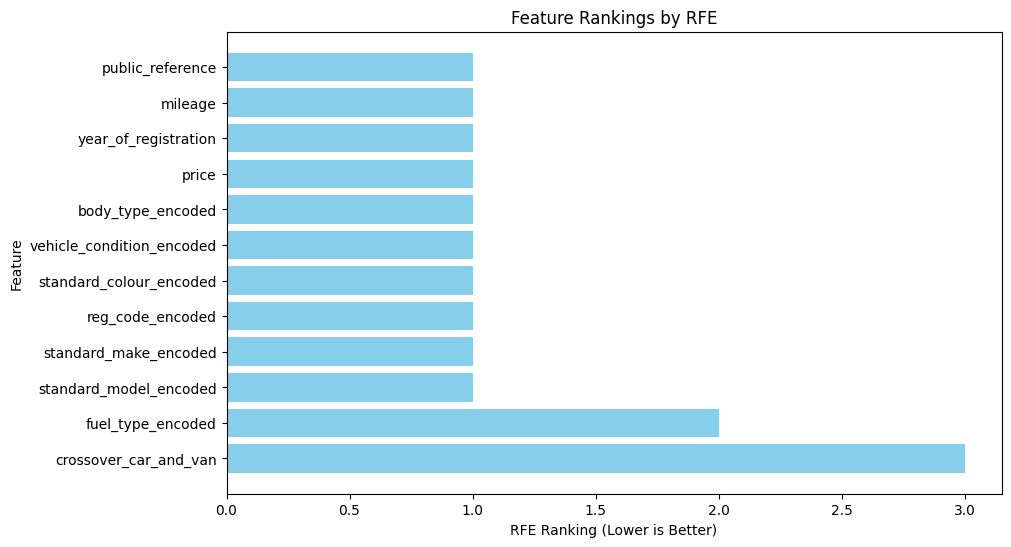

Top 10 Features Selected by RFE:
                      Feature  Ranking
0            public_reference        1
1                     mileage        1
2        year_of_registration        1
3                       price        1
7           body_type_encoded        1
6   vehicle_condition_encoded        1
9     standard_colour_encoded        1
8            reg_code_encoded        1
10      standard_make_encoded        1
11     standard_model_encoded        1


In [210]:
# Import required libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a baseline model (Random Forest)
rf = RandomForestRegressor(random_state=42)

# Initialize RFE with the baseline model
rfe = RFE(estimator=rf, n_features_to_select=10)  # Select 10 features

# Fit RFE on the sampled dataset
rfe.fit(X_sample, y_sample)

# Get feature rankings
feature_ranking_rfe = pd.DataFrame({
    'Feature': X_sample.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking', ascending=True)

# Plot feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking_rfe['Feature'], feature_ranking_rfe['Ranking'], color='skyblue')
plt.xlabel('RFE Ranking (Lower is Better)')
plt.ylabel('Feature')
plt.title('Feature Rankings by RFE')
plt.gca().invert_yaxis()
plt.show()

# Display the top 10 features selected by RFE
print("Top 10 Features Selected by RFE:")
print(feature_ranking_rfe.head(10))

***Step 2: SelectFromModel (Lasso)***

**What is SelectFromModel?**

SelectFromModel selects features based on the importance weights learned by a machine learning model. We'll use **Lasso Regression**, which uses L1 regularization to shrink less important feature coefficients to zero.

Steps:
1. Fit a **Lasso Regression** model on the data.
2. Select features based on non-zero coefficients.
3. Visualize the feature importance scores.

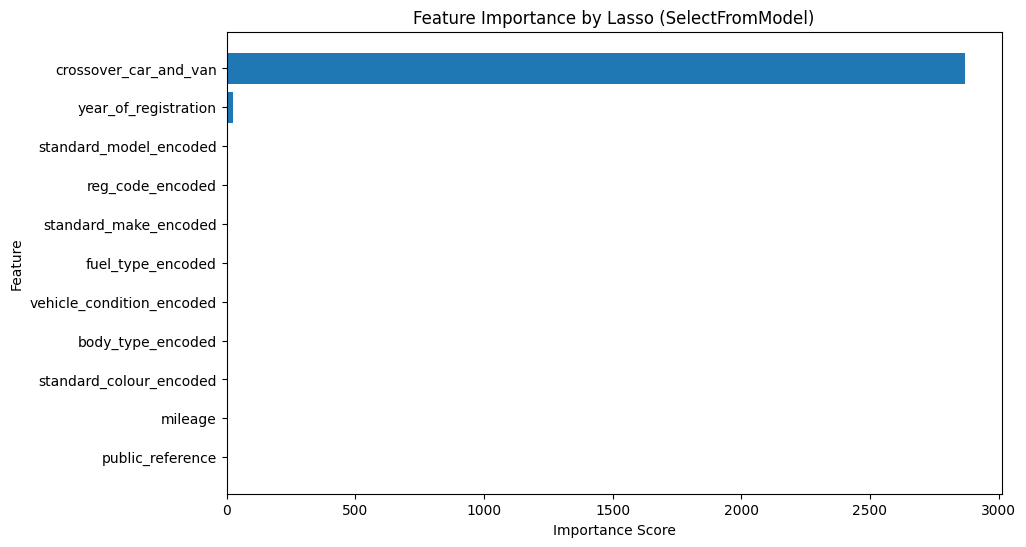

Features Selected by SelectFromModel (Lasso):
Index(['mileage', 'year_of_registration', 'crossover_car_and_van',
       'fuel_type_encoded', 'vehicle_condition_encoded', 'body_type_encoded',
       'reg_code_encoded', 'standard_colour_encoded', 'standard_make_encoded',
       'standard_model_encoded'],
      dtype='object')


In [211]:
# Import libraries for SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train, y_train)

# Use SelectFromModel to select features
sfm = SelectFromModel(lasso_model, prefit=True)
selected_features_sfm = X_train.columns[sfm.get_support()]

# Get feature importance scores
lasso_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(lasso_model.coef_)
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(lasso_importance['Feature'], lasso_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance by Lasso (SelectFromModel)')
plt.gca().invert_yaxis()
plt.show()

# Display selected features
print("Features Selected by SelectFromModel (Lasso):")
print(selected_features_sfm)

***Step 3: Mutual Information***

***What is Mutual Information?***

Mutual Information (MI) measures the dependency between each feature and the target variable. It is a non-parametric method, making it suitable for detecting both linear and non-linear relationships.

Steps:
1. Calculate MI scores for all features.
2. Rank features by their MI scores.
3. Visualize the rankings using a bar plot.

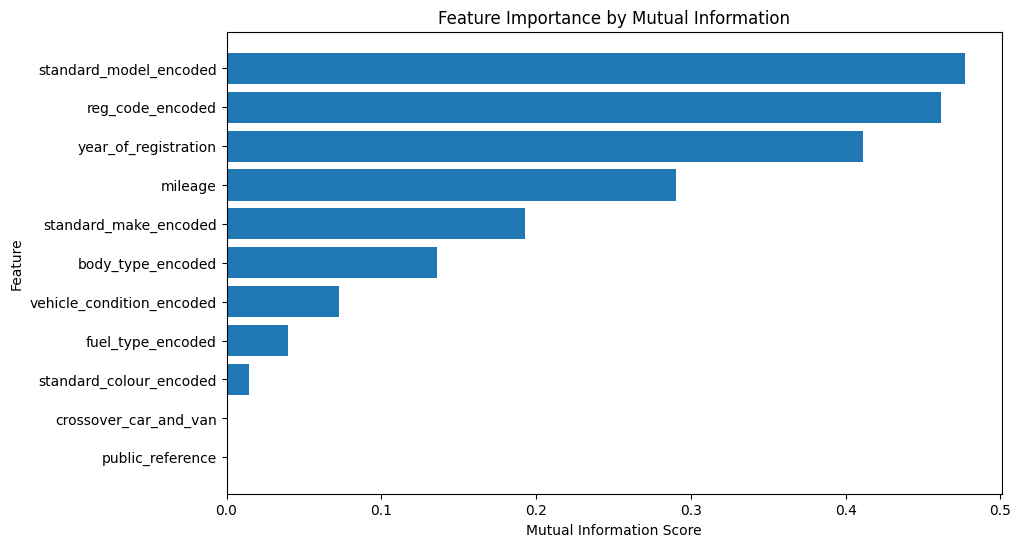

Top 10 Features by Mutual Information:
                      Feature  Mutual Information
10     standard_model_encoded            0.476861
7            reg_code_encoded            0.461743
2        year_of_registration            0.411126
1                     mileage            0.290227
9       standard_make_encoded            0.192759
6           body_type_encoded            0.136144
5   vehicle_condition_encoded            0.072902
4           fuel_type_encoded            0.039618
8     standard_colour_encoded            0.014558
3       crossover_car_and_van            0.000107


In [212]:
# Import libraries for Mutual Information
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information scores
mi_scores = mutual_info_regression(X_train, y_train)
mutual_info_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# Visualize mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual Information'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Feature Importance by Mutual Information')
plt.gca().invert_yaxis()
plt.show()

# Display top features by MI
print("Top 10 Features by Mutual Information:")
print(mutual_info_df.head(10))

***Step 4: Comparison of Results***

***How Do the Methods Compare?***

We'll compare the features selected by:
1. Recursive Feature Elimination (RFE).
2. SelectFromModel (Lasso Regression).
3. Mutual Information.

### Observations:
- Which features appear in all three methods?
- Do the selected features make sense in the context of the problem?
- Which method provides the most interpretable results?

In [214]:
# Compare selected features
print("Features Selected by RFE:")
print(feature_ranking_rfe.head(10))

print("\nFeatures Selected by SelectFromModel (Lasso):")
print(selected_features_sfm)

print("\nTop Features by Mutual Information:")
print(mutual_info_df.head(10))

Features Selected by RFE:
                      Feature  Ranking
0            public_reference        1
1                     mileage        1
2        year_of_registration        1
3                       price        1
7           body_type_encoded        1
6   vehicle_condition_encoded        1
9     standard_colour_encoded        1
8            reg_code_encoded        1
10      standard_make_encoded        1
11     standard_model_encoded        1

Features Selected by SelectFromModel (Lasso):
Index(['mileage', 'year_of_registration', 'crossover_car_and_van',
       'fuel_type_encoded', 'vehicle_condition_encoded', 'body_type_encoded',
       'reg_code_encoded', 'standard_colour_encoded', 'standard_make_encoded',
       'standard_model_encoded'],
      dtype='object')

Top Features by Mutual Information:
                      Feature  Mutual Information
10     standard_model_encoded            0.473048
7            reg_code_encoded            0.460604
2        year_of_registration  